In [10]:
from bs4 import BeautifulSoup as bs # tool scraping
from tqdm import tqdm 

import requests
import pandas as pd

Kategori:

finance: ekonomi, bisnis, dan investasi.

inet: teknologi, informasi, dan gadget.

sport: seputar olahraga.

oto: otomotif luar dan dalam negeri.

travel: inspirasi jalan-jalan ke mana saja.

food: kabar kuliner, resep, dan rekomendasi tempat makan.

health: artikel kesehatan, diet, seks, dan konsultasi.

edu: dunia pendidikan.

properti: jual beli, sewa rumah, dan apartemen tanah


In [11]:
kategori1 = ['finance', 'inet', 'sport', 'oto', 'travel', 'food', 'health']
kategori2 = ['edu', 'properti']

# dibedakan karena susunan URL nya berbeda


halaman = 5 # jumlah halaman, satu halaman memuat sekitar 20 berita
berita = []

# Scraping

In [12]:
# -- Kategori 1 --

for i in kategori1:
    print(f"Kategori - {i}:")
    for ii in range(halaman):
        url = f'https://{i}.detik.com/indeks?page={ii+1}'

        html = requests.get(url).text
        soup = bs(html, 'html.parser')

        container = soup.find_all("div", class_="container")

        for containers in tqdm(container, desc=f"\tHalaman - {ii+1}"):
            articles = containers.find_all("article", class_="list-content__item")

            for article in articles:
                judul = article.find("h3", class_="media__title").text.strip()

                # Karena judul berita yang diawali dengan "Video" itu pasti berupa video, bukan data text, jadi di sini dihapus (tidak dimasukkan), atau dilewati
                # "Infografis" = gambar

                if judul.startswith("Video") or judul.startswith("Infografis"):
                    continue

                link = article.find("a")["href"]

                #print(judul)
                #print(link)

                html_konten = requests.get(link).text
                soup_konten = bs(html_konten, 'html.parser')

                container_konten = soup_konten.find_all("div", class_="container")

                for containers_konten in container_konten:
                    articles_konten = containers_konten.find_all("article", class_="detail")

                    for article_konten in articles_konten:
                        #tanggal
                        tanggal = article_konten.find("div", class_="detail__date")
                        if tanggal:
                            tgl = tanggal.text.strip()
                            date = " ".join(tgl.split(", ")[1].split(" ")[:3])

                        konten = article_konten.find_all("p", class_ = None)

                        berita.append({
                            'judul': judul,
                            'tanggal': date,
                            'konten': '\n'.join([iii.text.strip() for iii in konten]),
                            'kategori': i
                        })

Kategori - finance:


	Halaman - 5: 100%|██████████| 5/5 [00:11<00:00,  2.36s/it]


Kategori - inet:


	Halaman - 5: 100%|██████████| 5/5 [00:24<00:00,  4.81s/it]


Kategori - sport:


	Halaman - 5: 100%|██████████| 5/5 [00:33<00:00,  6.77s/it]


Kategori - oto:


	Halaman - 5: 100%|██████████| 5/5 [00:21<00:00,  4.30s/it]


Kategori - travel:


	Halaman - 5: 100%|██████████| 5/5 [00:32<00:00,  6.53s/it]


Kategori - food:


	Halaman - 5: 100%|██████████| 5/5 [00:43<00:00,  8.66s/it]


Kategori - health:


	Halaman - 5: 100%|██████████| 5/5 [00:22<00:00,  4.57s/it]


In [13]:
# -- Kategori 2 --

# Dibuat beda sel, karena lama (tergantung jumlah halaman)

for i in kategori2:
    print(f'Kategori - {i}:')
    for ii in range(halaman):
        url = f'https://www.detik.com/{i}/indeks?page={ii+1}'

        html = requests.get(url).text
        soup = bs(html, 'html.parser')

        container = soup.find_all("div", class_="container")

        for containers in tqdm(container, desc=f"\tHalaman - {ii+1}"):
            articles = containers.find_all("article", class_="list-content__item")

            for article in articles:
                judul = article.find("h3", class_="media__title").text.strip()

                if judul.startswith("Video") or judul.startswith("Infografis"):
                    continue

                link = article.find("a")["href"]

                #print(judul)
                #print(link)

                html_konten = requests.get(link).text
                soup_konten = bs(html_konten, 'html.parser')

                container_konten = soup_konten.find_all("div", class_="container")

                for containers_konten in container_konten:
                    articles_konten = containers_konten.find_all("article", class_="detail")

                    for article_konten in articles_konten:
                        #tanggal
                        tanggal = article_konten.find("div", class_="detail__date")
                        if tanggal:
                            tgl = tanggal.text.strip()
                            date = " ".join(tgl.split(", ")[1].split(" ")[:3])

                        konten = article_konten.find_all("p", class_ = None)

                        berita.append({
                            'judul': judul,
                            'tanggal': date,
                            'konten': '\n'.join([iii.text.strip() for iii in konten]),
                            'kategori': i
                        })

Kategori - edu:


	Halaman - 5: 100%|██████████| 5/5 [00:30<00:00,  6.17s/it]


Kategori - properti:


	Halaman - 5: 100%|██████████| 5/5 [01:19<00:00, 15.90s/it]


In [14]:
df = pd.DataFrame(berita)
df

,judul,tanggal,konten,kategori
0,5 Catatan Ganjar Soal Efek PPN 12%: Tabungan M...,19 Des 2024,Eks Gubernur Jawa Tengah Ganjar Pranowo mengun...,finance
1,Momen Menperin Beri Penghargaan Bagi Penggiat IKM,19 Des 2024,Jakarta - Menteri Perindustrian Agus Gumiwang ...,finance
2,"Tolak PPN 12%, K-Popers & Gen Z: Harga Tiket K...",19 Des 2024,Berbagai kalangan masyarakat menolak kenaikan ...,finance
3,Ganjar Usul Kejar Pajak Orang Kaya daripada Na...,19 Des 2024,Pemerintah diusulkan mengejar pajak orang kaya...,finance
4,Seniman Irak Daur Ulang Barang Bekas Jadi Kary...,19 Des 2024,"Baghdad - Salwan Kareem, seniman Irak, mencipt...",finance
...,...,...,...,...
847,Menteri Ara Lapor ke Prabowo Sudah Sediakan 30...,16 Des 2024,Menteri Perumahan dan Kawasan Permukiman (PKP)...,properti
848,"BTN Salurkan KPR 5,4 Juta Unit Rumah Dalam 48 ...",15 Des 2024,"Direktur Utama PT BTN (Persero) Tbk, Nixon LP ...",properti
849,Ini yang Bikin Asbes Berbahaya buat Kesehatan ...,15 Des 2024,Asbes merupakan yang bahan atap rumah. Materia...,properti
850,Biang Kerok Rumah Selalu Terlihat Berantakan M...,15 Des 2024,Terkadang kamu sering merasa frustasi karena r...,properti


In [15]:
df.isna().sum()

judul       0
tanggal     0
konten      0
kategori    0
dtype: int64

In [16]:
df['kategori'].value_counts()

kategori
food        99
properti    99
sport       98
oto         97
finance     95
edu         95
travel      94
health      88
inet        87
Name: count, dtype: int64

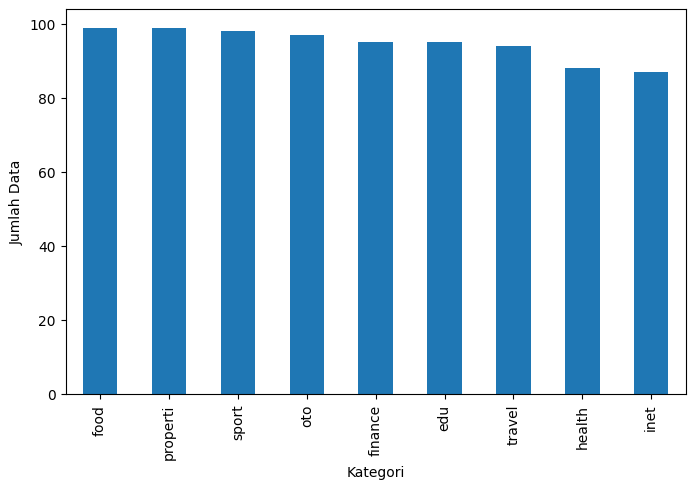

In [17]:
import matplotlib.pyplot as plt

# plot jumlah kategori

class_count = df['kategori'].value_counts()

plt.figure(figsize=(8, 5))
class_count.plot(kind='bar')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.show()

In [18]:
df.to_csv('berita.csv', index=False) # simpan ke csv